## Costo Unitario de Producción - Método de Costeo Variable
---

#### Datos de la Empresa
- **Unidades Fabricadas (UF):** 10.000  
- **Unidades Vendidas (UV):** 8.000  
- **Consumos de Producción por Unidad:**
  - Materia Prima (MP): $200  
  - Mano de Obra Directa (MOD): $300  
  - Costos Indirectos de Fabricación Variables (CIF Var): $400  
- **Costos de Estructura Mensuales (Fijos):** $850.000  

### Importaciones y configuración

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import squarify # ¡Necesitas instalar esta librería! pip install squarify

In [2]:
# Configuración de estilo para los gráficos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

### Definición de Datos

In [3]:
# Datos de la empresa 
datos = {
    'unidades_fabricadas': 10000,
    'unidades_vendidas': 8000,
    'materia_prima_por_unidad': 200,
    'mano_obra_por_unidad': 300,
    'cif_variables_por_unidad': 400,
    'costos_estructura_mensuales': 850000
}

### Cálculo del Costo Unitario de Producción (Método Variable)

El costo unitario de producción variable se determina sumando todos los costos variables incurridos por unidad fabricada.

\begin{align*}
\text{Costo Unitario de Producción (Variable)} = \text{Materia Prima} + \text{Mano de Obra Directa} + \text{CIF Variables} \\
\\
\end{align*}



In [4]:
# Cálculo del Costo Unitario de Producción (Método Variable)
def calcular_costo_unitario_variable():
    """Calcula el costo unitario de producción según el método variable"""
    costo_unitario = (datos['materia_prima_por_unidad'] + 
                     datos['mano_obra_por_unidad'] + 
                     datos['cif_variables_por_unidad'])
    
    df = pd.DataFrame({
        'Concepto': ['Materia Prima por unidad', 
                     'Mano de Obra por unidad', 
                     'CIF Variables por unidad', 
                     'COSTO UNITARIO VARIABLE'],
        'Valor': [f"${datos['materia_prima_por_unidad']}", 
                 f"${datos['mano_obra_por_unidad']}", 
                 f"${datos['cif_variables_por_unidad']}", 
                 f"${costo_unitario}"]
    })
    return costo_unitario, df

In [5]:
costo_unitario, df_costo = calcular_costo_unitario_variable()
print("\n1. CÁLCULO DEL COSTO UNITARIO VARIABLE")
display(df_costo.style.hide(axis="index"))


1. CÁLCULO DEL COSTO UNITARIO VARIABLE


Concepto,Valor
Materia Prima por unidad,$200
Mano de Obra por unidad,$300
CIF Variables por unidad,$400
COSTO UNITARIO VARIABLE,$900


Gráfico ajustado:


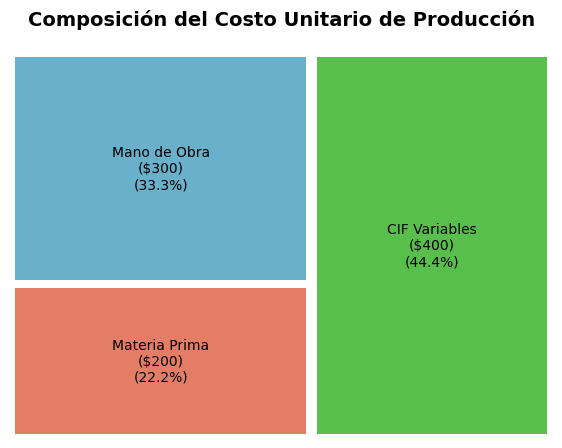

In [6]:
def crear_grafico_composicion_costo_treemap():
    """
    Gráfico de Treemap para la composición del costo unitario.
    Utiliza los datos de la empresa definidos arriba.
    """
    labels = ['Materia Prima', 'Mano de Obra', 'CIF Variables']
    valores = [
        datos['materia_prima_por_unidad'], 
        datos['mano_obra_por_unidad'], 
        datos['cif_variables_por_unidad']
    ]
    
    # Paleta de colores personalizada
    colores = ["#DD5C3F", "#449CBE", "#30AF1F"]
    
    # Crea las etiquetas con el nombre, valor y porcentaje
    etiquetas = [
        f'{label}\n(${valor})\n({valor / sum(valores):.1%})' 
        for label, valor in zip(labels, valores)
    ]
    
    # Crea la figura y el Treemap
    plt.figure(figsize=(7, 5))
    squarify.plot(
        sizes=valores, 
        label=etiquetas, 
        color=colores,
        alpha=0.8, 
        pad=2
    )
    
    plt.title('Composición del Costo Unitario de Producción', fontsize=14, fontweight='bold', pad=20)
    plt.axis('off') # Elimina los ejes para un look más limpio
    plt.show()

# Ejecutar el gráfico
print("Gráfico ajustado:")
crear_grafico_composicion_costo_treemap()

#### Cálculo del Valor del Inventario de Productos Terminados

Para valorar el inventario final, primero se calcula la cantidad de unidades no vendidas y luego se multiplican por el costo unitario de producción.

\begin{align*}
\text{Unidades en Inventario} = \text{Unidades Fabricadas} - \text{Unidades Vendidas} \\
\\
\end{align*}



\begin{align*}
\text{Valor del Inventario} = \text{Unidades en Inventario} \times \text{Costo Unitario de Producción} \\
\\
\end{align*}

In [7]:
def calcular_inventario_productos_terminados(costo_unitario):
    """Calcula el valor del inventario de productos terminados"""
    unidades_inventario = datos['unidades_fabricadas'] - datos['unidades_vendidas']
    valor_inventario = unidades_inventario * costo_unitario
    
    df = pd.DataFrame({
        'Concepto': ['Unidades fabricadas', 'Unidades vendidas', 
                     'Unidades en inventario', 'Costo unitario', 
                     'VALOR INVENTARIO PRODUCTOS TERMINADOS'],
        'Cálculo': ['Dato', 'Dato', 
                   f"{datos['unidades_fabricadas']} - {datos['unidades_vendidas']}",
                   'Calculado anteriormente',
                   f"{unidades_inventario} × {costo_unitario}"],
        'Valor': [f"{datos['unidades_fabricadas']} unid", 
                 f"{datos['unidades_vendidas']} unid", 
                 f"{unidades_inventario} unid", 
                 f"${costo_unitario}", 
                 f"${valor_inventario:,.2f}"]
    })
    
    return valor_inventario, unidades_inventario, df

In [8]:
valor_inventario, unidades_inventario, df_inventario = calcular_inventario_productos_terminados(costo_unitario)
print("\n2. CÁLCULO DEL INVENTARIO DE PRODUCTOS TERMINADOS")
display(df_inventario.style.hide(axis="index"))


2. CÁLCULO DEL INVENTARIO DE PRODUCTOS TERMINADOS


Concepto,Cálculo,Valor
Unidades fabricadas,Dato,10000 unid
Unidades vendidas,Dato,8000 unid
Unidades en inventario,10000 - 8000,2000 unid
Costo unitario,Calculado anteriormente,$900
VALOR INVENTARIO PRODUCTOS TERMINADOS,2000 × 900,"$1,800,000.00"


In [9]:
# Consolidación de la estructura de datos

datos = {
    'unidades': {
        'fabricadas': 10000,
        'vendidas': 8000
    },
    'consumos_produccion': {
        'materia_prima': 200,
        'mano_obra_directa': 300,
        'cif_variables': 400
    },
    'costos': {
        'estructura_mensuales': 850000
    }
}


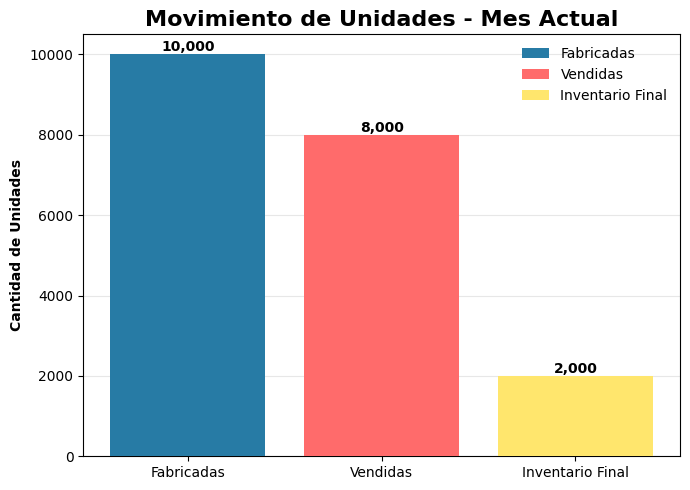

In [18]:
def crear_grafico_inventario_estilizado():
    """Gráfico de barras agrupadas para el movimiento de unidades."""
    unidades_fabricadas = datos['unidades']['fabricadas']
    unidades_vendidas = datos['unidades']['vendidas']
    unidades_inventario = unidades_fabricadas - unidades_vendidas
    
    n_grupos = 3
    x = np.arange(n_grupos)
    
    fig, ax = plt.subplots(figsize=(7, 5))
    
    barras_fabricadas = ax.bar(x[0], unidades_fabricadas, width=0.8, color="#277BA5", label='Fabricadas', zorder=3)
    barras_vendidas = ax.bar(x[1], unidades_vendidas, width=0.8, color='#ff6b6b', label='Vendidas', zorder=3)
    barras_inventario = ax.bar(x[2], unidades_inventario, width=0.8, color='#ffe66d', label='Inventario Final', zorder=3)
    
    ax.set_title('Movimiento de Unidades - Mes Actual', fontsize=16, fontweight='bold')
    ax.set_ylabel('Cantidad de Unidades', fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(['Fabricadas', 'Vendidas', 'Inventario Final'])
    ax.grid(axis='y', alpha=0.3, zorder=0)
    ax.legend(loc='upper right', frameon=False, fontsize=10)
    
    # Añadir valores en las barras
    for bar in [barras_fabricadas, barras_vendidas, barras_inventario]:
        height = bar[0].get_height()
        ax.text(bar[0].get_x() + bar[0].get_width()/2, height, f'{height:,}', 
                ha='center', va='bottom', fontweight='bold')
        
    plt.tight_layout()
    plt.show()

crear_grafico_inventario_estilizado()

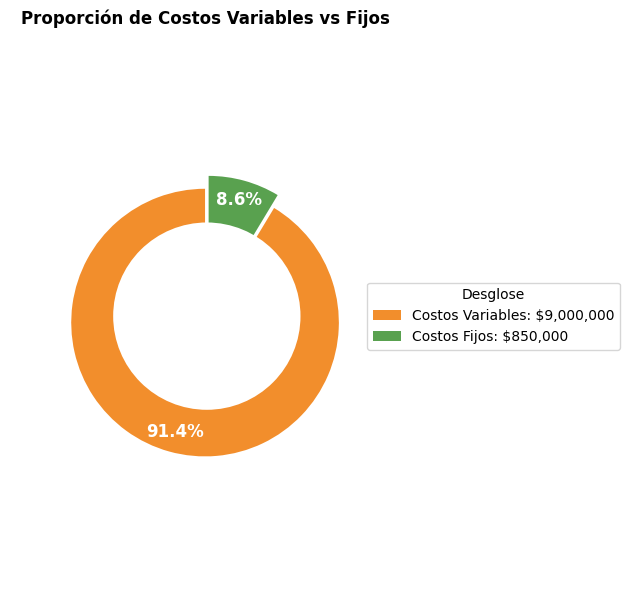

In [19]:

def crear_grafico_proporcion_costos():
    """Gráfico de dona para mostrar la proporción entre costos variables y fijos."""
    
    # Cálculos
    costo_unitario = (datos['consumos_produccion']['materia_prima'] + 
                      datos['consumos_produccion']['mano_obra_directa'] + 
                      datos['consumos_produccion']['cif_variables'])
    costo_variable_total = costo_unitario * datos['unidades']['fabricadas']
    costos_fijos = datos['costos']['estructura_mensuales']
    total_costos = costo_variable_total + costos_fijos
    
    # Preparar datos
    labels = ['Costos Variables', 'Costos Fijos']
    valores = [costo_variable_total, costos_fijos]
    colores = ['#f28e2c', '#59a14f']
    explode = (0.05, 0.05)  # Separar ligeramente las porciones
    
    # Crear gráfico de dona
    fig, ax = plt.subplots(figsize=(6, 6))
    wedges, texts, autotexts = ax.pie(valores, explode=explode, labels=labels, colors=colores,
                                      autopct='%1.1f%%', startangle=90, pctdistance=0.85,
                                      textprops={'fontsize': 12, 'color': 'white', 'weight': 'bold'})
    
    # Dibujar círculo en el centro para convertirlo en dona
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)
    
    # Añadir título
    ax.set_title('Proporción de Costos Variables vs Fijos', fontsize=12, fontweight='bold', pad=20)
    
    # Añadir leyenda con valores absolutos
    leyenda_labels = [f'{label}: ${val:,.0f}' for label, val in zip(labels, valores)]
    ax.legend(wedges, leyenda_labels, title="Desglose", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    # Ajustar aspecto
    ax.axis('equal')
    plt.tight_layout()
    plt.show()

crear_grafico_proporcion_costos()